# TP - Evaluation d'hypothèse et Validation Croisée

Dans ce TP vous devrez implémenter des procédures d'évaluation de classifieurs. Vous utiliserez pour cela le classifieur des k-plus-proches voisins, déjà implémenté dans la librairie `scikit-learn`, et vous l'appliquerez sur des données décrivant des voitures (`
Auto2.csv`)

### D'abord, chargeons les données

Les données décrivent des voitures.
On a des variables comme le poids de la voiture, son accelération, etc...
et on cherche à prédire sa cylindrée, qui peut être 2, 4, 6 ou 8 cylindres

In [4]:
%matplotlib inline
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

Pour charger les données depuis un fichier csv, on utilise un module python qui s'appelle `pandas`.

In [5]:
import pandas
autos = pandas.read_csv( "Auto2.csv")
autos.drop(labels=['name','origin'],axis=1,inplace=True)
autos = autos[autos.cylinders != 3]
autos = autos[autos.cylinders != 5]
autos.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year
0  29.0          4          85.0        52.0    2035          22.2    76
1  29.9          4          98.0        65.0    2380          20.7    81
2  23.0          4         140.0        78.0    2592          18.5    75
3  27.2          4         141.0        71.0    3190          24.8    79
4  28.0          4         151.0        90.0    2678          16.5    80

maintenant, on converti ces données en tableaux numpy:
* `X` sera le tableau de données à 5 variables
* la cylindrée sera stockée dans `y`

In [6]:
X = autos[['mpg','displacement','weight','acceleration','year']].as_matrix()
y = autos[['cylinders']].as_matrix().squeeze()

/Users/utilisateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/utilisateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


comme les données ont des échelles très différentes selon les variables, on va normaliser par variable (donc diviser chaque variable par son écart-type). Si on ne normalisait pas, alors le poids dominerait les autres variables lors du calcul de la distance dans l'algorithme des k-ppv

In [7]:
X = X / np.std(X,axis=0)

In [8]:
print('X=',X,'\ny=',y[:20])

X= [[ 3.70525275  0.81270333  2.38523624  8.06883579 20.61151225]
 [ 3.82024335  0.93699913  2.7896129   7.52364418 21.9675328 ]
 [ 2.93864873  1.33857019  3.03809942  6.72402983 20.34030815]
 ...
 [ 3.57748541  1.02305007  2.88806982  5.63364661 20.61151225]
 [ 2.61923039  2.20864081  4.01446394  6.14249211 20.88271636]
 [ 2.42757939  1.14734587  3.83278747  7.95979747 20.61151225]] 
y= [4 4 4 4 4 4 8 4 6 8 4 8 8 8 8 6 6 8 8 8]


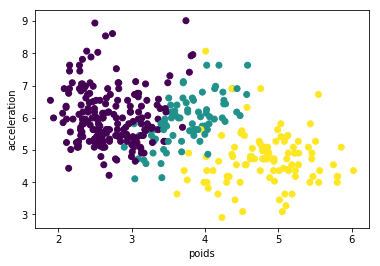

In [9]:
# Affichons les points de X, en utilisant seulement les 3ieme et 4ieme colonnes de X.
plt.scatter(X[:,2],X[:,3],c=y)
plt.xlabel('poids')
plt.ylabel('acceleration');

### Ensuite, voici quelques éléments de python+numpy dont vous aurez besoin pour ce TP

In [10]:
# Comparer des tableaux numpy, et calculer le nombre d'elements differents
a = np.array([10,20,30,40,50,60])
b = np.array([10,20,40,30,40,30])

d = (a != b)
print('d=',d)

e = d.astype(int)
print('e=',e)

print('nombre de uns=',np.sum(e))

d= [False False  True  True  True  True]
e= [0 0 1 1 1 1]
nombre de uns= 4


In [11]:
# Enlever un element du tableau (ou une ligne d'un tableau 2D)
a2 = np.delete(a,3)
print('voici le tableau a sans son quatrieme element : ',a2)
print("notez que tableau a n'a pas changé : ",a)

voici le tableau a sans son quatrieme element :  [10 20 30 50 60]
notez que tableau a n'a pas changé :  [10 20 30 40 50 60]


### Pour le classifieur, on utilisera les k-plus proches voisins, implémenté dans `scikit-learn`

In [12]:
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier

In [13]:
# Créeons un `classifieur` qui calculera les 3 plus proches voisins d'un nouveau points
# en prenant des voisins parmis tous les exemples de X
classifieur = KNeighborsClassifier(n_neighbors=3).fit(X,y)

In [14]:
# On voudrait prédire la classe de l'exemple Z
# on appelle donc la fonction predict qui va chercher ses 3 plus proches voisins
# renvoyer la classe majoritaire
Z = np.array([2,3,2,1,7])
print('prediction pour Z = ',classifieur.predict([Z]))

prediction pour Z =  [8]


In [15]:
# Je peux aussi calculer des prédictions pour plusieurs exemples à la fois.
# par exemple ici, je calcule les prédictions des 5 premiers exemples de X
print('prediction pour les cinq premiers exemples de X = ',classifieur.predict(X[:5]))

prediction pour les cinq premiers exemples de X =  [4 4 4 4 4]


### Sujet du TP

Avant tout, on va mélanger les données avec la commande `X,y = shuffle(X,y)`. Cette commande provient du module python `scikit-learn`

* Commencez par ecrire une fonction `calcul_erreur_empirique(X,y,k)` qui calcule l'erreur empirique du k-ppv sur l'ensemble des données `X,y`
* Pour différentes valeurs de k (par exemple, k=1..15), vous afficherez le graphique de l'erreur empirique du k-ppv sur les données de ce TP
* Ecrivez une fonction `calcule_erreur(X_train,y_train,X_test,y_test,k)` qui prenne en entrée deux tableaux de données, deux tableaux d'étiquette et une valeur k. Cette fonction doit renvoyer l'erreur empirique du k-ppv calculée sur `X_test,y_test`, mais en utilisant les voisins pris sur `X_train`. Cette fonction sera utilisée dans la question suivante pour appliquer le `hold_out`.
* Implémentez la procédure de `hold_out`: Pour différentes valeurs de `k`, vous calculerez l'erreur sur un ensemble de test comportant 30% des données, et vous calculerez aussi l'erreur empirique sur les 70% restants. Vous afficherez sur un graphique ces deux erreurs, en fonction de k. N'oubliez pas d'appeler la fonction `shuffle` au début de votre fonction, pour bien mélanger les données.
* Relancez plusieurs fois le calcul du `hold_out` et comparez les résultats obtenus. Normalement, ces résultats devraient varier grandement. Pouvez-vous expliquer pourquoi ?
* Implémentez la méthode `leave-one-out`, et expliquez pourquoi cette méthode est pertinente ici.
* Comparer les résultats du `leave-one-out` et du `hold-out`.

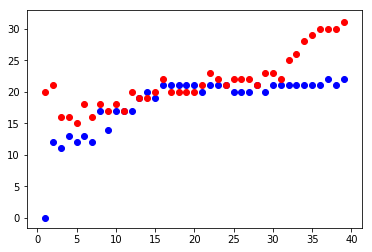

In [31]:
X,y = shuffle(X,y)

def calcul_erreur_empirique(X,y,k):
    classifieur2 = KNeighborsClassifier(n_neighbors=k).fit(X,y)    
    resultatPredi = classifieur2.predict(X)
    d2 = (resultatPredi != y)
    e2 = d2.astype(int)
    uns2 = np.sum(e2) 
    #print("nombre de erreurs:", uns2)
    return uns2

listX = []
listE = []
for i in range(1, 40):
    listX.append(i)
    listE.append(calcul_erreur_empirique(X,y,i))
plt.scatter(listX,listE,c = 'blue')

######################

X,y = shuffle(X,y)
split= len(X)//3
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]
#print(X_test,y_test)
listX3 = []
listE3 = []
def calcule_erreur(X_train,y_train,X_test,y_test,k):
    classifieur3 = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train) 
    resultatPredi3 = classifieur3.predict(X_test)
    d3 = (resultatPredi3 != y_test)
    e3 = d3.astype(int)
    uns3 = np.sum(e3) 
    return uns3

for i in range(1, 40):
    listX3.append(i)
    listE3.append(calcule_erreur(X_train,y_train,X_test,y_test,i))    
plt.scatter(listX3,listE3,c = 'red')
    


### Visualisation du classifieur


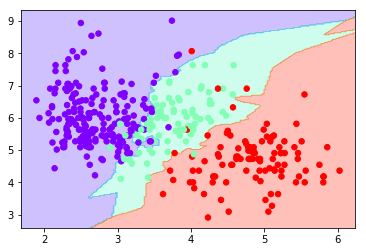

In [21]:
# On peut chercher à visualiser le classifieur k-ppv, sur les colones 2 et 3
# pour ce faire, lancez ce code

def visualize_kppv_classifier(X, y,**kwargs):
    X = X[:,2:4]

    classifieur_visu = KNeighborsClassifier(n_neighbors=3).fit(X,y)
    def predict(x): return classifieur_visu.predict(x)

    
    ax = plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    #ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    if predict:
        xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                             np.linspace(*ylim, num=200))
        xxyy   = np.c_[xx.ravel(), yy.ravel()]
        Z      = np.array([predict([d])
                           for d in xxyy]).reshape(xx.shape)

        # Create a color plot with the results
        n_classes = len(np.unique(y))
        contours = ax.contourf(xx, yy, Z, alpha=0.3,
                               cmap='rainbow')

        ax.set(xlim=xlim, ylim=ylim)

        
visualize_kppv_classifier(X,y)